<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h5 style="color:#C0C0C0">LMU, 9 May 2016</h5>
    <h4 style="color:rgba(0,0,0,0.6)">Stefanie Donner, Céline Hadziioannou, Ceri Nunn</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P04 - Fourier series & transformation</div>
        </div>
    </div>
</div>

**Please, do not forget to execute the Cell 1 first!**

In [1]:
# Cell 1: Preparation for programming

%pylab inline
from __future__ import print_function
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

Populating the interactive namespace from numpy and matplotlib


### Exercise 1: Calculating the coefficients of a Fourier series

This exercise is dedicated to the understanding of Fourier series and its construction from coefficients. 
Read the data of an arbitrary periodic function from the local file "`./data/XX.DUMM..BHZ.mseed`". Please, do not get confused by the naming of the file or the entries in the `stats` container, it is NO seismogram, just an arbitrary periodic function.

a) Try to understand the code of Cell 2 and execute the Cell.

b) Load the data, find the period of the function, and plot the function in Cell 3. 

c) Determine the first 5 coefficients for the function and print them in Cell 4.

d) Try to understand the code of Cell 5 and execute the Cell.

e) Try to set-up to original function again using the function in Cell 5 and the coefficients you have determined in Cell 4. Plot it. Why does it look different?

f) Repeat step c) and e) and play around with the number of coefficients, e.g. putting it higher. Is there a number from which the reconstructed function does not change anymore? Can you guess why?

In [2]:
# Cell 2: Defining function for retrieving Fourier coefficients 

def fourier_series_coeff(f, T, N):
    """Calculates the first 2*N+1 Fourier series coeff. of a periodic function.

    Given a periodic, function f(t) with period T, this function returns the
    coefficients a0, {a1,a2,...},{b1,b2,...} such that:

    f(t) ~= a0/2+ sum_{k=1}^{N} ( a_k*cos(2*pi*k*t/T) + b_k*sin(2*pi*k*t/T) )
    
    Parameters
    ----------
    f : the periodic function, a callable like f(t)
    T : the period of the function f, so that f(0)==f(T)
    N_max : the function will return the first N_max + 1 Fourier coeff.

    Returns
    -------
    a0 : float
    a,b : numpy float arrays describing respectively the cosine and sine coeff.
    """
    # From Nyquist theoreom (which we will learn later) we must use a sampling 
    # freq. larger than the maximum frequency you want to catch in the signal. 
    # In this case, we know in advance that it is 50 Hz because we are 
    # manufacturing the signal.
    f_sample = 2 * N
    
    # We also need to use an integer sampling frequency, or the
    # points will not be equispaced between 0 and 1. We then add +2 to f_sample.
    t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)
    #y = np.fft.rfft(f(t)) / t.size
    y = np.fft.rfft(f) / t.size
    
    y *= 2
    #return y[0].real, y[1:-1].real, -y[1:-1].imag
    return y[0].real, y[1:-1].real[0:N], -y[1:-1].imag[0:N]

-0.5
[-0.50246553 -0.5023471  -0.50214975]
[-0.39239646 -0.18676682 -0.11403408]


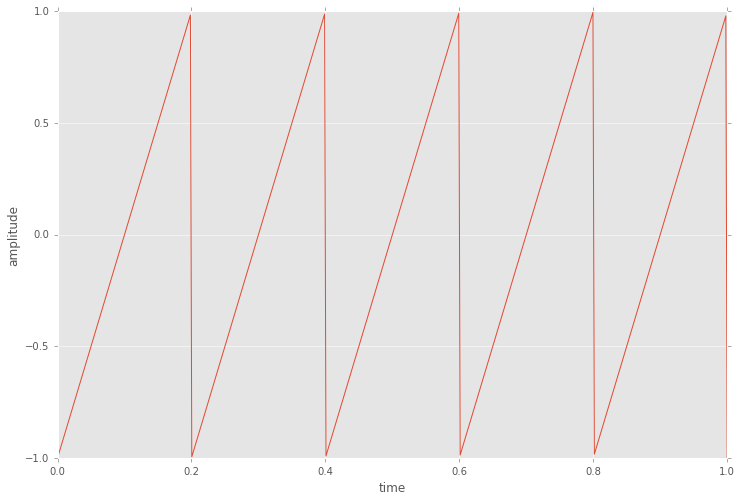

In [3]:
# Eamxple to function in cell 2 
# sawtooth function f(t) = A * (t/T)  with 0 < t < T 
# A 5 Hz waveform sampled at 500 Hz for 1 second
from scipy import signal
# set up sawtooth function
s = 1.0
f1 = 5.
f2 = 500.
t = np.linspace(0, s, f2)
saw = signal.sawtooth(2 * np.pi * f1 * t)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(t, saw)

# get the first 3 coefficients of Fourier series for sawtooth function
No = 3
T = 5.
a0, a, b = fourier_series_coeff(saw, T, No)
print(a0)
print(a)
print(b)

Period:  1.0 s
Frequency:  1.0 Hz
         network: XX
         station: DUMM
        location: 
         channel: BHZ
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:49:59.000000Z
   sampling_rate: 1.0
           delta: 1.0
            npts: 3000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'record_length': 4096, 'encoding': u'FLOAT64', 'filesize': 24576, u'dataquality': u'D', 'number_of_records': 6, 'byteorder': u'>'})


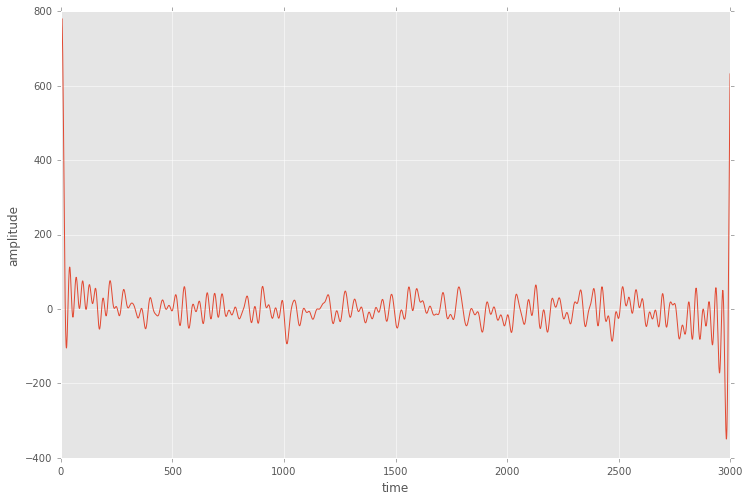

In [4]:
# Cell 3: Load data + find period + plot function
from obspy import read

st = read('./Data/XX.DUMM..BHZ.mseed')
tr = st[0]
period = tr.stats.delta
frequency = tr.stats.sampling_rate
print('Period: ', period, 's')
print('Frequency: ', frequency, 'Hz')
print(tr.stats)

# plotting option 1
#tr.plot()
# plotting option 2
t = np.arange(0, tr.stats.npts) * tr.stats.delta
plt.plot(t, tr.data)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

In [5]:
# Cell 4: Determine the first 5 coefficients of the function
T = 1
no = 5
a0, a, b = fourier_series_coeff(tr.data, T, no)
print(a0)
print(a)
print(b)

155.522573684
[ 1856.23309401  1857.0766546    360.78159266  2365.86607711  1861.86606841]
[ 1001.81871357  1253.01441991  1508.4950138   2250.44019111  1501.41607453]


In [6]:
# Cell 5: creating periodic function from given coefficients using the Fourier series
def series_real_coeff(a0, a, b, t, T):
    """calculates the Fourier series with period T at times t,
       from the real coeff. a0,a,b"""
    tmp = ones_like(t) * a0 / 2.
    for k, (ak, bk) in enumerate(zip(a, b)):
        tmp += ak * cos(2 * pi * (k + 1) * t / T) + bk * sin(
            2 * pi * (k + 1) * t / T)
    return tmp

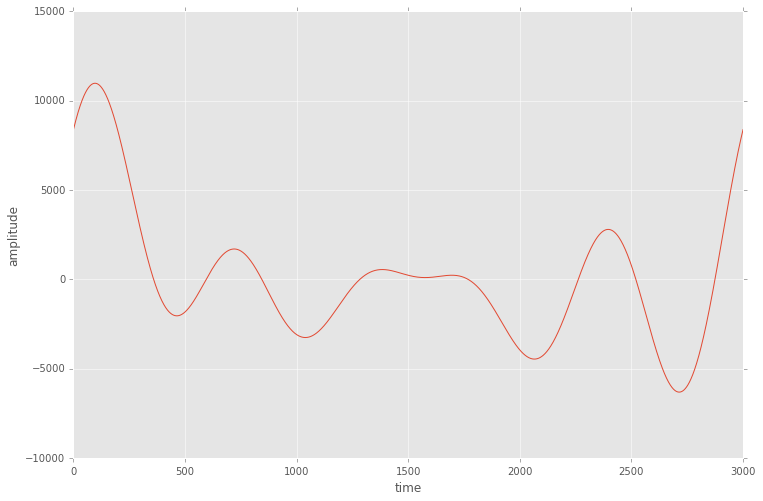

In [7]:
# Cell 6: set-up original function and plot it
# defining sample rate of data - 10 Hz data 
samp = tr.stats.npts
dt = tr.stats.delta         
length = samp * dt
# time axis 
t = np.linspace(0, length, samp)
# number of coefficients
N = 5               

f = series_real_coeff(a0, a, b, t, dt)
# print(f)
plt.plot(t, f)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

<br />
<br />
<br />

### Exercise 2: Convergence of Fourier Series

This exercise is dedicated to the understanding of the convergence of Fourier series. The following code defines a square wave and then approximates it by its Fourier series.

a) Try to understand the code of Cell 7 and execute it. Have a look at the figure.

b) Change the period T in the cell and run it again. Describe what you observe and try to explain it.

b) Change the number of hamonics and run the cell again. Describe what you observe and try to explain it.

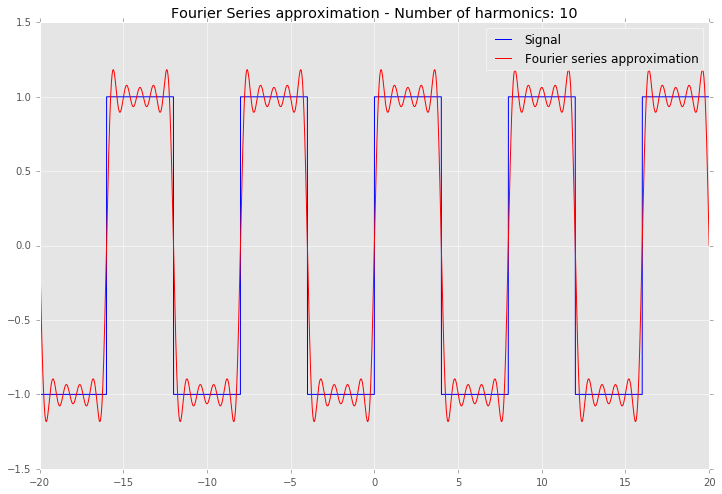

In [8]:
# Cell 7: approximating the square wave by its Fourier series with varying resolution

# Setup
x = np.linspace(-20,20,10000)  # x-Achsis
T = 8                          # period, inital value: 8
harmonics = 10                 # number of harmonics, initial value: 10

def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1
    
    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# define An coefficients
def an(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0
# define Bn coefficients
def bn(n):
    global T
    bn = (2*np.pi*n)/T
    return bn

# define Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + an(n)*np.sin(bn(n)*x)
        except:
            print("pass")
            pass
    return partialSums

y = []
f = []
for i in x:
    y.append(squareWave(i))
    f.append(fourierSeries(harmonics,i))

# plotting the results
plt.plot(x,y,color="blue",label="Signal")
plt.plot(x,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation - Number of harmonics: "+str(harmonics))
plt.legend()
plt.show()
